# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнил студент гр. 3385 Баринов Максим Алексеевич. Вариант №1

## Цель работы

Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения


### Основные определения


#### Плотность сети
Плотность ненаправленной сети G вычисляется как:

$$den(G) = \frac{2L}{g(g-1)}$$

где $L$ - количество имеющихся связей, $g$ - количество акторов.

#### Диаметр сети
Диаметр $diam$ - максимальное геодезическое расстояние между любой парой вершин в сети G:

$$diam(G) = \max_{i,j} d_{ij}$$

где $d_{ij}$ - длина кратчайшего пути между вершинами $i$ и $j$.

#### Коэффициент кластеризации
Глобальный коэффициент кластеризации(тенденция к созданию закрытых треугольников):
определяется как доля закрытых треугольников по отношению к общему количеству открытых и закрытых







### Меры центральности

#### Центральность по степени
Для вершины $i$ в неориентированной сети:

$$C_D(i) = deg(i)$$

Нормированная центральность по степени:

$$C_D'(i) = \frac{deg(i)}{g - 1}$$

#### Центральность по близости
$$C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}$$

где $d_{ij}$ - расстояние между вершинами.

Нормированная центральность по близости:

$$C_C'(i) = \frac{g-1}{\sum_{j \neq i} d_{ij}}$$

#### Центральность по посредничеству
$$C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$$

где $\sigma_{jk}$ - количество кратчайших путей между $j$ и $k$, $\sigma_{jk}(i)$ - количество таких путей через $i$.

Нормированная центральность по посредничеству:

$$C_B'(i) =\frac{2 C_B(i)}{(g-1)(g-2)}$$



### Меры престижа для ориентированных сетей

#### Престиж по степени
$$P_D(i) = \frac{deg_{in}(i)}{g-1}$$


#### Престиж по близости
$$
P_P(i) = \frac{|I_i|}{g-1} \cdot \frac{|I_i|}{\sum d_{ij}}
$$
где $|I_i|$ — количество вершин, достижимых из $i$,  

#### Престиж по рангу
Получается через решение системы уравнений:
$$
\left(\frac{1}{a}E - X\right)^TP_R = x
$$
где:  
- $X$ — социоматрица
- $a = \frac{1}{\lambda}$, где $\lambda$ — максимальное собственное значение матрицы $X$  
- $x$ — вектор сумм столбцов  
- $E$ — единичная матрица  

Нормированный престиж:
$$
P_R^{'}(n_i) = \frac{P_R(n_i)}{m}$$

где $ m = \sum^{g-1}_{k=1} a^kA^k_{g-1}$


### Алгоритмы визуализации сетей

#### Фрюхтерман-Рейнгольд
Работает по принципу пружинок, если ребро есть то вершины стараются притянуться.
Минимизирует функцию энергии:

$$E = \sum_{i \neq j} k_r(d_{ij}) + \sum_{(i,j) \in E} k_a(d_{ij})$$

где $k_r$ - сила отталкивания, $k_a$ - сила притяжения.

#### Камада-Каваи
Минимизирует разницу между геодезическими и евклидовыми расстояниями:

$$E = \sum_{i \neq j} \frac{1}{2} k_{ij}(||p_i - p_j|| - l_{ij})^2$$

где $l_{ij}$ - желаемое расстояние, $k_{ij}$ - вес пружины.

## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы


### Загрузка библиотек

In [2]:
# библиотека для работы с графами
if (!require(igraph))
{
  install.packages("igraph")
  library(igraph)
}

# библиотека для перевода igraph в statnet
if (!require(intergraph)) 
{
  install.packages("intergraph")
  library(intergraph)
}

# библиотека для анализа графа
if (!require(statnet)) 
{
  install.packages("statnet")
  library(statnet)
}

### Задание 1
Из файла florentine_business.csv (для нечётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Вывести полученную социоматрицу на экран.

In [6]:
# чтение данных
data <- read.csv("./florentine_business.csv",
                 header = FALSE,
                 skip = 2)

#Преобразование в граф и в социоматрицу
graph <- igraph::graph_from_adjacency_matrix(as.matrix(data))
network <- igraph::as_adjacency_matrix(graph)

network

  [[ suppressing 16 column names ‘V1’, ‘V2’, ‘V3’ ... ]]



16 x 16 sparse Matrix of class "dgCMatrix"
                                   
V1  . . . . . . . . . . . . . . . .
V2  . . . . . . . . . . . . . . . .
V3  . . . . 1 1 . . 1 . 1 . . . . .
V4  . . . . . . 1 1 . . 1 . . . . .
V5  . . 1 . . . . 1 . . 1 . . . . .
V6  . . 1 . . . . . 1 . . . . . . .
V7  . . . 1 . . . 1 . . . . . . . .
V8  . . . 1 1 . 1 . . . 1 . . . . .
V9  . . 1 . . 1 . . . 1 . . . 1 . 1
V10 . . . . . . . . 1 . . . . . . .
V11 . . 1 1 1 . . 1 . . . . . . . .
V12 . . . . . . . . . . . . . . . .
V13 . . . . . . . . . . . . . . . .
V14 . . . . . . . . 1 . . . . . . .
V15 . . . . . . . . . . . . . . . .
V16 . . . . . . . . 1 . . . . . . .

### Задание 2
Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.

In [9]:
# переводим в список ребер с помощью igraph
edges <- igraph::as_edgelist(graph)

head(edges, 5)

V3,V5
V3,V6
V3,V9
V3,V11
V4,V7


### Задание 3
Присвоить имена столбцам и строкам социоматрицы (имена — первая строка в csv-файле после комментариев)

In [13]:
names <- colnames(read.csv("./florentine_business.csv", 
                  skip = 1))
rownames(network) <- names
colnames(network) <- names
network

  [[ suppressing 16 column names ‘Acciaiuoli’, ‘Albizzi’, ‘Barbadori’ ... ]]



16 x 16 sparse Matrix of class "dgCMatrix"
                                            
Acciaiuoli   . . . . . . . . . . . . . . . .
Albizzi      . . . . . . . . . . . . . . . .
Barbadori    . . . . 1 1 . . 1 . 1 . . . . .
Bischeri     . . . . . . 1 1 . . 1 . . . . .
Castellani   . . 1 . . . . 1 . . 1 . . . . .
Ginori       . . 1 . . . . . 1 . . . . . . .
Guadagni     . . . 1 . . . 1 . . . . . . . .
Lamberteschi . . . 1 1 . 1 . . . 1 . . . . .
Medici       . . 1 . . 1 . . . 1 . . . 1 . 1
Pazzi        . . . . . . . . 1 . . . . . . .
Peruzzi      . . 1 1 1 . . 1 . . . . . . . .
Pucci        . . . . . . . . . . . . . . . .
Ridolfi      . . . . . . . . . . . . . . . .
Salviati     . . . . . . . . 1 . . . . . . .
Strozzi      . . . . . . . . . . . . . . . .
Tornabuoni   . . . . . . . . 1 . . . . . . .

### Задание 4
С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, передаваемые в функцию.

In [15]:
# создание объекта сети в statnet
net <- network(as.matrix(network), 
               matrix.type = "adjacency", # тип входной матрицы, также может быть "edgelist"
               directed = FALSE) # определяет будет ли построена направленная сеть или нет

net

 Network attributes:
  vertices = 16 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 15 
    missing edges= 0 
    non-missing edges= 15 

 Vertex attribute names: 
    vertex.names 

No edge attributes

### Задание 5
 Отобразить сеть с помощью алгоритмов укладки Фрюхтермана—
Рейнгольда и Камада—Каваи. Объяснить, в чём различие между
алгоритмами и укладками.

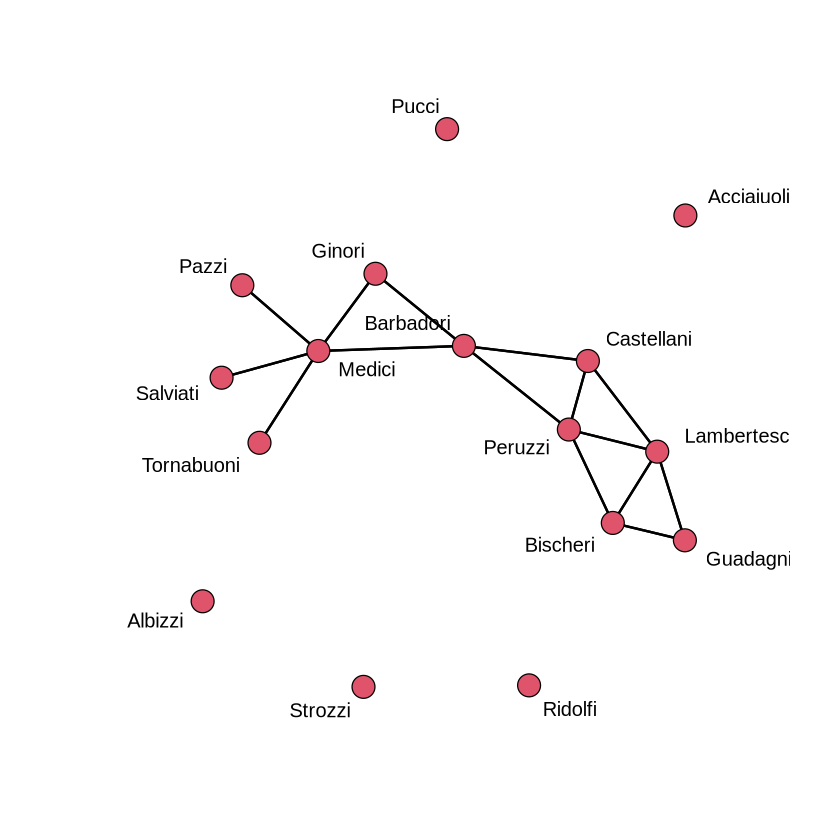

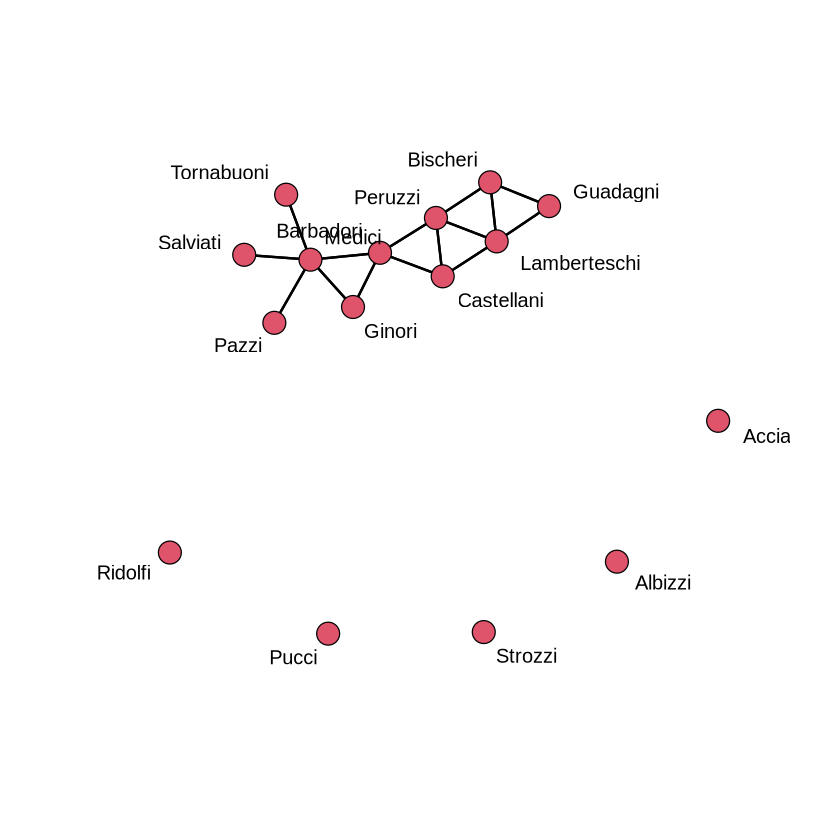

In [16]:
# Фрюхтерман—Рейнгольд
gplot(net, gmode ="graph", mode = "fruchtermanreingold", displaylabels = TRUE)

# Камада—Каваи
gplot(net,gmode ="graph",mode = "kamadakawai",displaylabels = TRUE)

Алгоритм Фрюхтермана—Рейнгольда моделирует вершины как взаимно отталкивающиеся частицы, а рёбра — как пружины, притягивающие связанные вершины, стремясь равномерно распределить узлы по плоскости. Камада—Каваи основан на минимизации разницы между расстояниями на плоскости и кратчайшими путями в графе, моделируя ребра как пружины с желаемой длиной. Фрюхтермана—Рейнгольда быстрее и лучше подходит для больших графов, а Камада—Каваи точнее отражает глобальную структуру, но требует больше вычислительных ресурсов и лучше для небольших сетей.

### Задание 6
Вывести «описательную сводку» сети.

In [17]:
summary(net)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 15 
   missing edges = 0 
   non-missing edges = 15 
 density = 0.125 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    5    3
 [2,]    6    3
 [3,]    9    3
 [4,]   11    3
 [5,]    7    4
 [6,]    8    4
 [7,]   11    4
 [8,]    8    5
 [9,]   11    5
[10,]    9    6
[11,]    8    7
[12,]   11    8
[13,]   10    9
[14,]   14    9
[15,]   16    9

### Задание 7
Вычислить «пятичисловую сводку» сети:
- Вычислить размер сети.
- Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.
- Определить число компонент в сети по графику. Подтвердить
свои догадки с помощью соответствующей функции. Сделать
выводы.
- Вычислить диаметр сети. Сделать выводы
- Вычислить коэффициент кластеризации. Сделать выводы.

In [22]:
# размер сети
n <- network.size(net)
cat("Размер сети:", n, "\n\n")

# плотность сети
cat("Плотность по формуле:", round((2 * network.edgecount(net)) / (n * (n - 1)), 4), "\n")
cat("Плотность через gden:", round(gden(net), 4), "\n\n")

# Число компонент связности сети
cat("Число компонент по графику: ", 6, "\n")

cat("Число компонент функцией: ", components(net), "\n\n")

# Диаметр сети 
cat("Диаметр графа: ", diameter(graph), "\n\n")

# Коэффициент кластеризации
cat("Коэффициент кластеризации:", round(gtrans(net, mode = "graph"), 4), "\n")

Размер сети: 16 

Плотность по формуле: 0.125 
Плотность через gden: 0.125 

Число компонент по графику:  6 
Число компонент функцией:  6 

Диаметр графа:  5 

Коэффициент кластеризации: 0.4167 


##### Вывод
Плотность 0.125 означает, что сеть достаточно разрежена. Это говорит о том, что связи между узлами нечасты, сеть не насыщена. Можно сделать вывод, что деловых связей между многоими семьями практически нет.

Диаметр 5 отражает сравнительно небольшое максимальное расстояние внутри компонент, показывая, что даже самые удаленные семьи связаны через относительно короткую цепочку посредников, что свидетельствует о том, что сеть умеренно связана.

Кластеризация достаточно высокая т.к на графе видно много треугольников

### Задание 8
Заполнить таблицу для различных мер центральности. Примечание: меры центральности вычислить для неизолированных вершин

In [26]:
# Создание подграфа без изолированных вершин
non_isolated_vertices <- which(degree(net) > 0)
new_net <- get.inducedSubgraph(net, non_isolated_vertices)

# Вычисление мер
g <- network.size(new_net)
deg <- degree(new_net) / 2
closeness_cent <- closeness(new_net, gmode = "graph")
between_cent <- betweenness(new_net, gmode = "graph")
info_cent <- infocent(new_net, gmode = "graph")

# Вычисление нормированных мер
norm_degree <- deg / (g - 1)
norm_betweenness <- (2 * between_cent) / ((g - 1) * (g - 2))
norm_info_cent <- info_cent / sum(info_cent)


table <- data.frame(
  names = network.vertex.names(new_net),
  C_D = round(norm_degree,2),
  C_C = round(closeness_cent, 2),
  C_B = round(norm_betweenness, 2),
  C_I = round(norm_info_cent,2)
)

table

names,C_D,C_C,C_B,C_I
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Barbadori,0.4,0.59,0.56,0.12
Bischeri,0.3,0.40,0.06,0.09
Castellani,0.3,0.50,0.11,0.10
Ginori,0.2,0.45,0.00,0.10
Guadagni,0.2,0.31,0.00,0.08
Lamberteschi,0.4,0.42,0.13,0.10
Medici,0.5,0.53,0.53,0.11
Pazzi,0.1,0.36,0.00,0.06
Peruzzi,0.4,0.53,0.30,0.11


Семья Medici —  лидер сети. Они имеют самые высокие показатели по степенной центральности (0.5). Это означает, что Медичи не только имели больше всего прямых деловых связей с другими семьями, но и часто выступали посредниками между семьями, которые напрямую не взаимодействовали.

Сильные, но не доминирующие позиции занимают семьи Barbadori и Peruzzi. У них хорошие показатели по нескольким метрикам центральности (0.4-0.5), что говорит о важной роли в деловой сети, хотя и уступающей Медичи.

Средний уровень влияния демонстрируют семьи Bischeri, Castellani и Guadagni с показателями центральности около 0.2-0.3. Они участвовали в деловых отношениях, но не были ключевыми игроками.

### Задание 9
Выполнить п. 2–7 для направленной сети из файла krackhardt_advice.csv
(для нечётных вариантов).

### Задание 2
Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.


In [30]:
data <- read.csv('./krackhardt_advice.csv', header=FALSE, skip = 2)

graph <- igraph::graph_from_adjacency_matrix(as.matrix(data))

# Социоматрица графа
network <- igraph::as_adjacency_matrix(graph)

# Список смежности
edges <- igraph::as_edgelist(graph)
head(edges, 5)

V1,V2
V1,V4
V1,V8
V1,V16
V1,V18


### Задание 3
Присвоить имена столбцам и строкам социоматрицы (имена — первая строка в csv-файле после комментариев).

In [32]:
# Создание имен от 1:nrow(data)
names <- 1:nrow(data)

rownames(network) <- names
colnames(network) <- names

network

  [[ suppressing 21 column names ‘1’, ‘2’, ‘3’ ... ]]



21 x 21 sparse Matrix of class "dgCMatrix"
                                            
1  . 1 . 1 . . . 1 . . . . . . . 1 . 1 . . 1
2  . . . . . 1 1 . . . . . . . . . . . . . 1
3  1 1 . 1 . 1 1 1 1 1 1 1 . 1 . . 1 1 . 1 1
4  1 1 . . . 1 . 1 . 1 1 1 . . . 1 1 1 . 1 1
5  1 1 . . . 1 1 1 . 1 1 . 1 1 . 1 1 1 1 1 1
6  . . . . . . . . . . . . . . . . . . . . 1
7  . 1 . . . 1 . . . . 1 1 . 1 . . 1 1 . . 1
8  . 1 . 1 . 1 1 . . 1 1 . . . . . . 1 . . 1
9  1 1 . . . 1 1 1 . 1 1 1 . 1 . 1 1 1 . . 1
10 1 1 1 1 1 . . 1 . . 1 . 1 . 1 1 1 1 1 1 .
11 1 1 . . . . 1 . . . . . . . . . . . . . .
12 . . . . . . 1 . . . . . . . . . . . . . 1
13 1 1 . . 1 . . . 1 . . . . 1 . . . 1 . . .
14 . 1 . . . . 1 . . . . . . . . . . 1 . . 1
15 1 1 1 1 1 1 1 1 1 1 1 1 1 1 . 1 1 1 1 1 1
16 1 1 . . . . . . . 1 . . . . . . . 1 . . .
17 1 1 . 1 . . 1 . . . . . . . . . . . . . 1
18 1 1 1 1 1 . 1 1 1 1 1 . 1 1 1 1 . . 1 1 1
19 1 1 1 . 1 . 1 . . 1 1 . . 1 1 . . 1 . 1 .
20 1 1 . . . 1 . 1 . . 1 1 . 1 1 1 1 1 . . 1
21 . 1 1 1 .

### Задание 4
С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, передаваемые в функцию.

In [33]:
# создание объекта сети в statnet
net <- network(as.matrix(network), 
               matrix.type = "adjacency", # тип входной матрицы, также может быть "edgelist"
               directed = TRUE) # определяет будет ли построена направленная сеть или нет

net

 Network attributes:
  vertices = 21 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 190 
    missing edges= 0 
    non-missing edges= 190 

 Vertex attribute names: 
    vertex.names 

No edge attributes

### Задание 5
Отобразить сеть с помощью алгоритмов укладки Фрюхтермана—
Рейнгольда и Камада—Каваи. Объяснить, в чём различие между
алгоритмами и укладками.

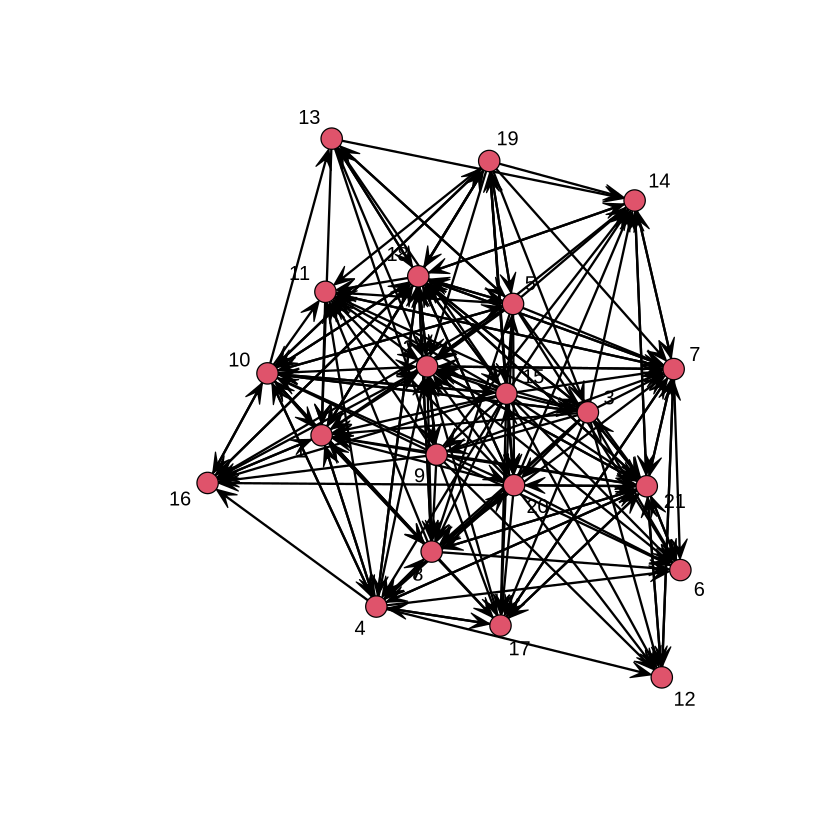

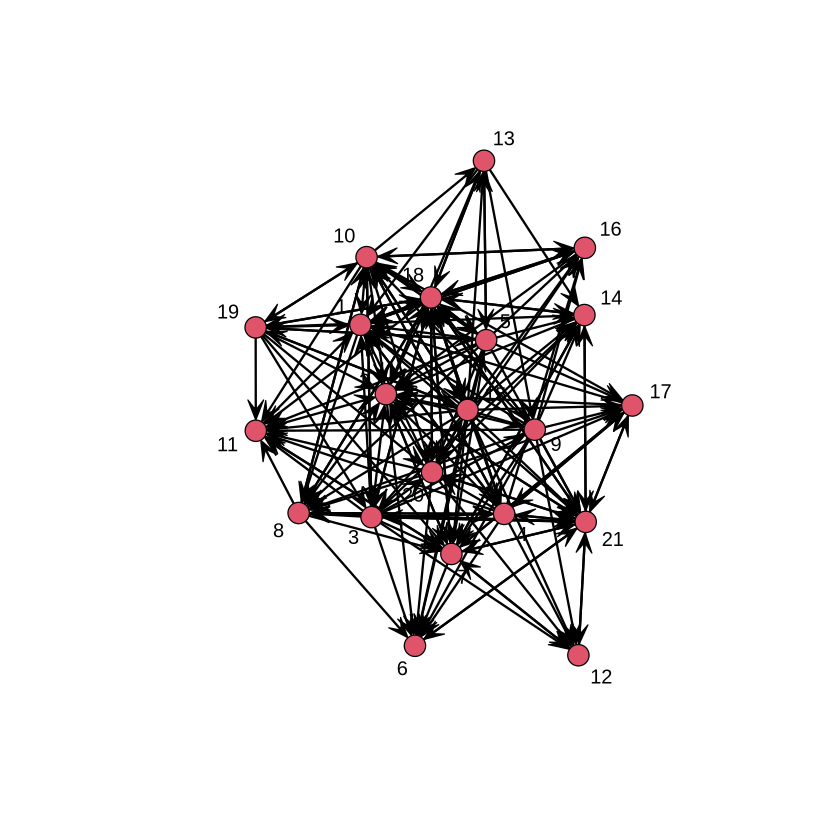

In [35]:
# Фрюхтерман—Рейнгольд
gplot(net, gmode ="digraph", mode = "fruchtermanreingold", displaylabels = TRUE)

# Камада—Каваи
gplot(net,gmode ="digraph",mode = "kamadakawai",displaylabels = TRUE)

### Задание 6
Вывести «описательную сводку» сети.

In [36]:
summary(net)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 190 
   missing edges = 0 
   non-missing edges = 190 
 density = 0.452381 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    3    1
  [2,]    4    1
  [3,]    5    1
  [4,]    9    1
  [5,]   10    1
  [6,]   11    1
  [7,]   13    1
  [8,]   15    1
  [9,]   16    1
 [10,]   17    1
 [11,]   18    1
 [12,]   19    1
 [13,]   20    1
 [14,]    1    2
 [15,]    3    2
 [16,]    4    2
 [17,]    5    2
 [18,]    7    2
 [19,]    8    2
 [20,]    9    2
 [21,]   10    2
 [22,]   11    2
 [23,]   13    2
 [24,]   14    2
 [25,]   15    2
 [26,]   16    2
 [27,]   17    2
 [28,]   18    2
 [29,]   19    2
 [30,]   20    2
 [31,]   21    2
 [32,]   10    3
 [33,]   15    3
 [34,]   18    3
 [35,]   19    3
 [36,]   21    3
 [37,]    1    4
 

### Задание 7
Вычислить «пятичисловую сводку» сети:
- Вычислить размер сети.
- Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.
- Определить число компонент в сети по графику. Подтвердить
свои догадки с помощью соответствующей функции. Сделать
выводы.
- Вычислить диаметр сети. Сделать выводы
- Вычислить коэффициент кластеризации. Сделать выводы.

In [38]:
# размер сети
n <- network.size(net)
cat("Размер сети:", n, "\n\n")

# плотность сети
cat("Плотность по формуле:", round((network.edgecount(net)) / (n * (n - 1)), 4), "\n")
cat("Плотность через gden:", round(gden(net), 4), "\n\n")

# Число компонент связности сети
cat("Число компонент по графику: ", 1, "\n")

cat("Число компонент функцией: ", components(net), "\n\n")

# Диаметр сети 
cat("Диаметр графа: ", diameter(graph), "\n\n")

# Коэффициент кластеризации
cat("Коэффициент кластеризации:", round(gtrans(net, mode = "graph"), 4), "\n")

Размер сети: 21 

Плотность по формуле: 0.4524 
Плотность через gden: 0.4524 

Число компонент по графику:  1 
Число компонент функцией:  1 

Диаметр графа:  3 

Коэффициент кластеризации: 0.664 


Плотность сети 0.45 показывает, что менеджеры поддерживают умеренное количество связей между собой.

Сеть состоит из одной компоненты, это означает, что все менеджеры соединены друг с другом — либо напрямую, либо через других коллег.

Кластеризация высокая, что ожидаемо. Исходя из прошлых данных.

### Задание 10
Заполнить таблицу для различных мер престижа:

In [55]:
# Престиж по степени
g <- network.size(net)


# Престиж по близости
C_C <- igraph::closeness(graph, mode = "in", normalized = FALSE)
I_i <- colSums(igraph::distances(graph, mode = "in") > 0)
P_P <- (I_i^2 / (g - 1)) * C_C

#  Престиж по рангу
X <- as.matrix(data)
lambda_max <- ceiling(max(Re(eigen(X)$values)))
a <- 1 / lambda_max
I_mat <- diag(ncol(X))
P_R <- solve((1/a) * I_mat - t(X), colSums(X))

# Нормировка престижа по рангу
m <- 1
for (k in 1:(g-1)) 
{
    m <- m + (a^k) * factorial(g-1) / factorial(g-1-k)
}

P_R_norm <- P_R / m


table <- data.frame(
  n = network.vertex.names(net),
  P_D = degree(net, cmode = "indegree") / (g-1),
  P_P = round(P_P, 4),
  P_R = round(P_R_norm, 4)
)

table

,n,P_D,P_P,P_R
,<chr>,<dbl>,<dbl>,<dbl>
V1,1,0.65,0.6667,0.0094
V2,2,0.90,0.9091,0.0155
V3,3,0.25,0.5556,0.0047
V4,4,0.40,0.6250,0.0079
V5,5,0.25,0.5000,0.0035
V6,6,0.50,0.6667,0.0095
V7,7,0.65,0.7407,0.0118
V8,8,0.50,0.6667,0.0086
V9,9,0.20,0.4878,0.0029


##### Вывод
Из таблица выше видно, что акторы 2, 21, 18 имеют нибольшие показатели престижа.
А значит у них высокое влиянии на других акторов этой сети.

## Выводы

Для анализа двух социальных сетей применялись инструменты языка R и библиотеки statnet и igraph, позволившие выявить структурные характеристики, определить роль отдельных акторов и представить результаты в виде графических схем.